In [35]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
def read_agent_output(fn):
    actor_loss = []
    critic1_loss = []
    critic2_loss = []
    for line in open(fn):
        data = line.split()
        actor_loss.append(float(data[0]))
        critic1_loss.append(float(data[1]))
        critic2_loss.append(float(data[2]))
    return actor_loss, critic1_loss, critic2_loss

In [43]:
fn = 'testing/30_08_2023_12-21-10_Exaalt_sync_medgraph_greedy_25_25_noisey_agent_0'
a_loss, c1_loss, c2_loss = read_agent_output(fn)

In [44]:
epochs = 200
# avg_action = np.mean(np.array(action).reshape(-1, epochs), axis=1)
# avg_loss = np.mean(np.array(a_loss).reshape(-1, epochs), axis=1)
# avg_reward = np.mean(np.array(reward).reshape(-1, epochs), axis=1)
# avg_state_0 = np.mean(np.array(state_0).reshape(-1, epochs), axis=1)
# avg_state_1 = np.mean(np.array(state_1).reshape(-1, epochs), axis=1)
# avg_state_2 = np.mean(np.array(state_2).reshape(-1, epochs), axis=1)

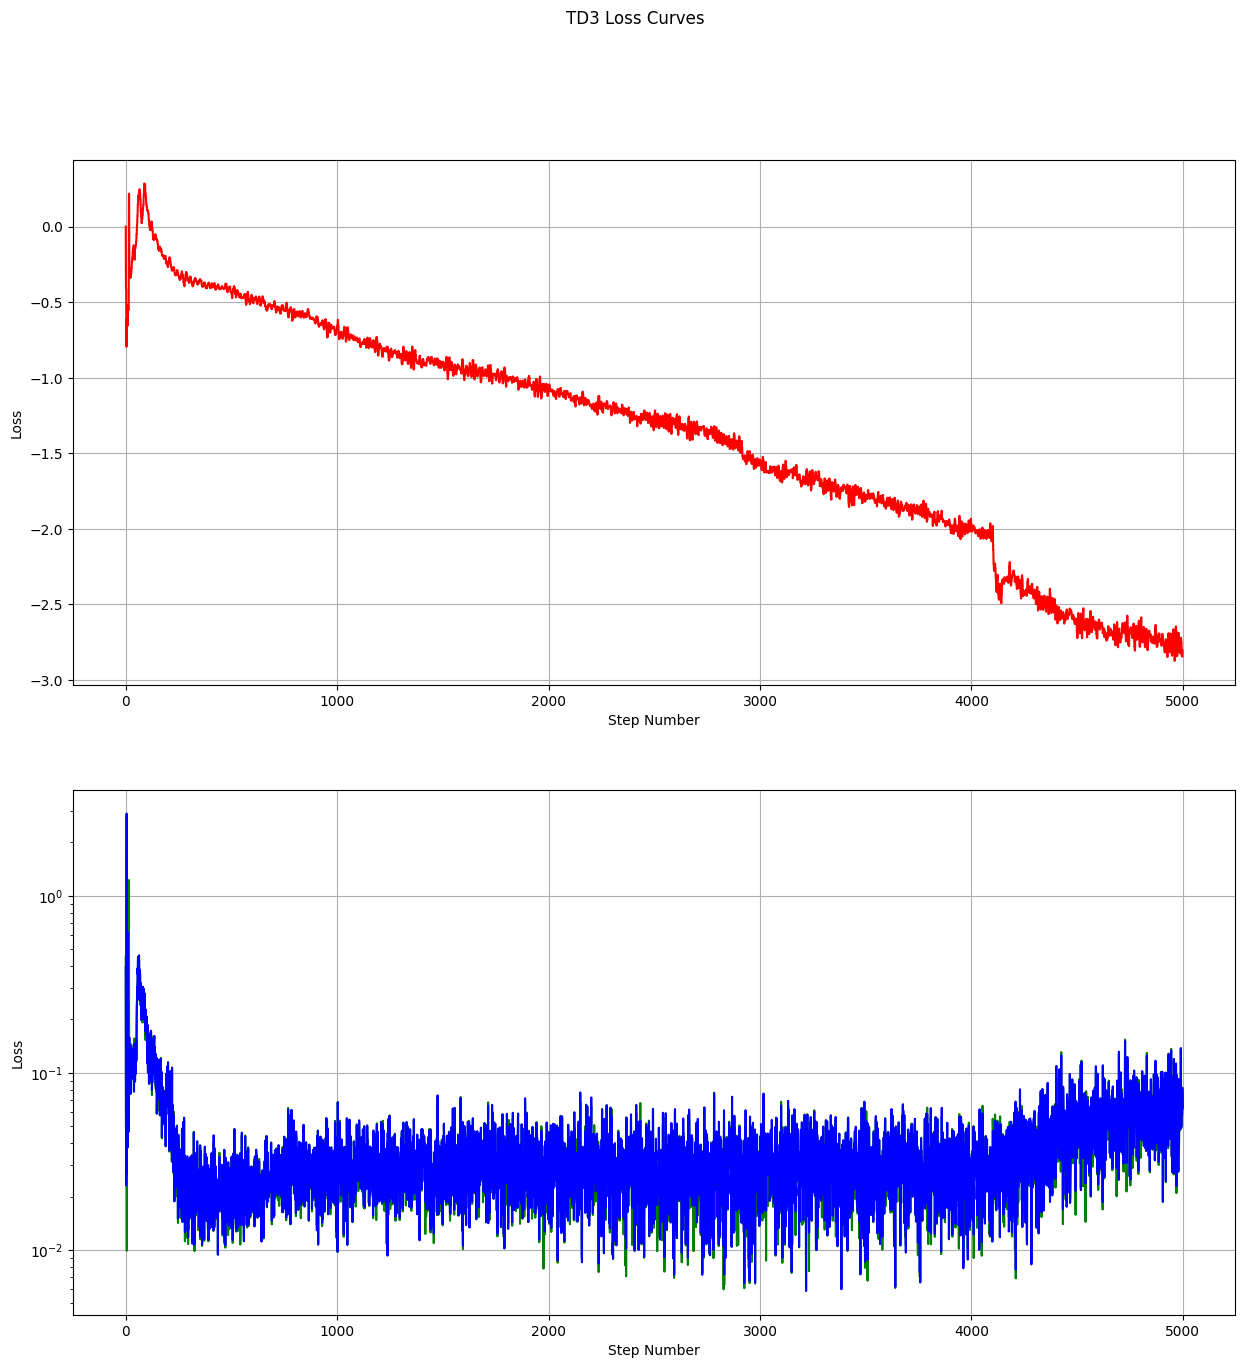

In [45]:
fig, axs = plt.subplots(2)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0].plot(a_loss, 'r')
axs[1].plot(c1_loss, 'g', c2_loss, 'b')
axs[1].set_yscale("log")
axs[0].grid()
axs[1].grid()
fig.suptitle("TD3 Loss Curves")
for ax in axs.flat:
    ax.set(xlabel="Step Number", ylabel="Loss")

In [53]:
def read_more_exaalt_output(fn):
    episode = 0
    eps = []
    steps = []
    rewards = []
    action_prob = []
    for line in open(fn):
        data = line.split()
        if data[0] == '1':
            episode += 1
        eps.append(episode)
        steps.append(int(data[0]))
        rewards.append(float(data[3]))
        action_prob.append(float(data[6]))
    return pd.DataFrame({'episode':eps, 'step':steps, 'reward':rewards, 'action_prob':action_prob})

In [54]:
log_dfs = []
num_proc = 200
fn = 'testing/30_08_2023_08-05-27_Exaalt_sync_smallgraph_secpos_0'
log_dfs.append(read_more_exaalt_output(fn))
# for i in range(1, num_proc):
#     fn = 'imp3/22_08_2023_14-16-39_Exaalt_async_GraphTD3-v4_ExaExaaltGraph-v4_AC_25nw_5sd_2500NoS_2Ke_100spe_Lu_const_doneFix10/22_08_2023_14-16-39_Exaalt_async_GraphTD3-v4_ExaExaaltGraph-v4_AC_25nw_5sd_2500NoS_2Ke_100spe_Lu_const_doneFix10_' + str(i)
#     log_dfs.append(read_more_exaalt_output(fn))

<Figure size 1280x960 with 0 Axes>

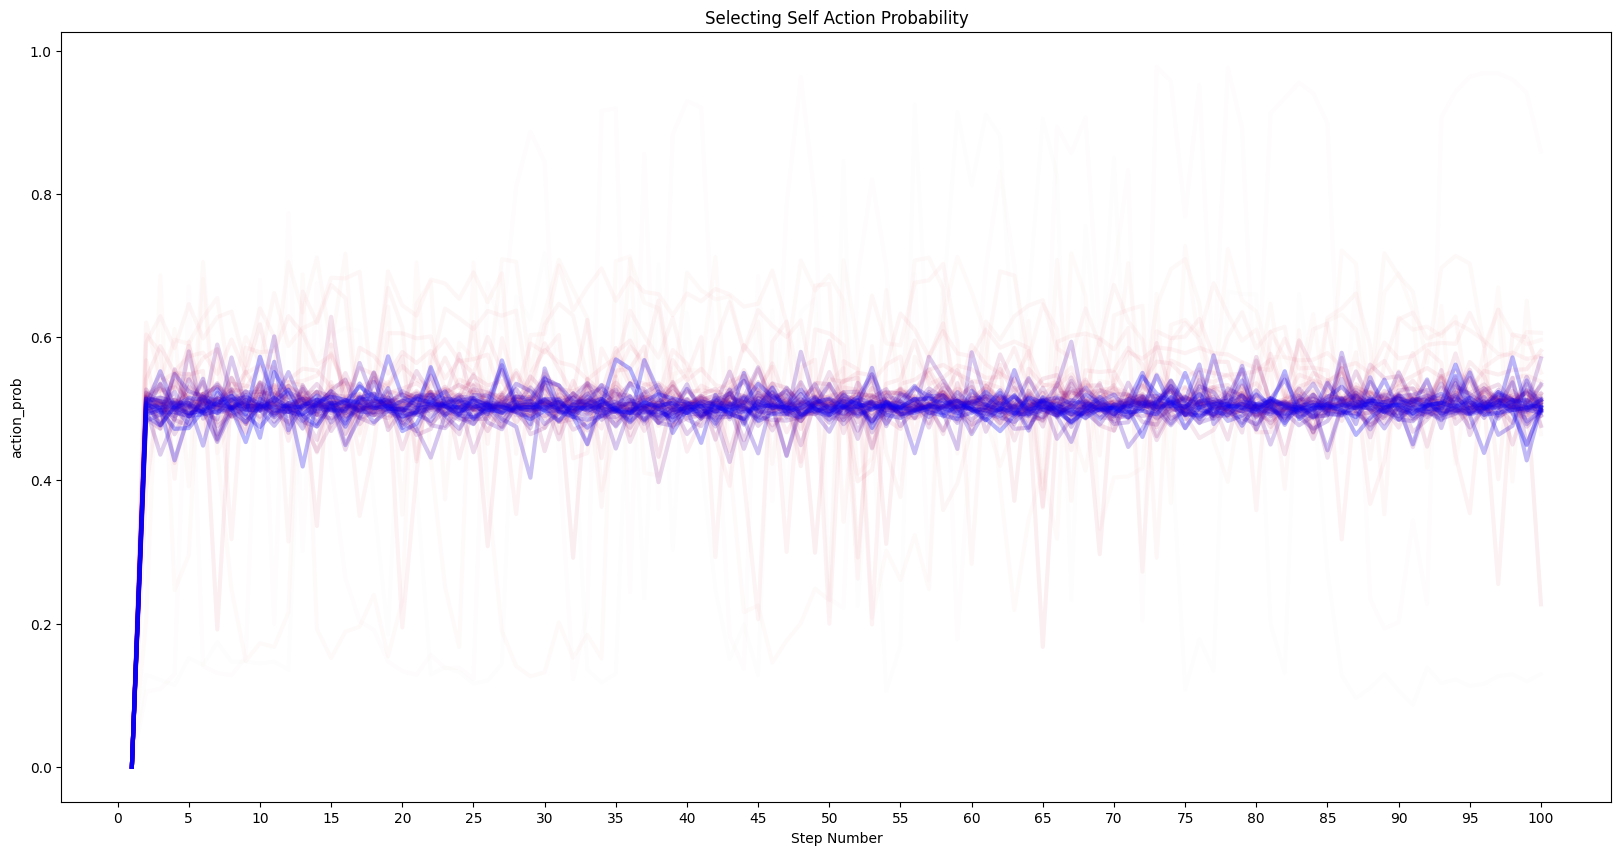

In [55]:
n_cases       = len(log_dfs)
cases         = ["Case " + str(ii) for ii in np.arange(n_cases)]

episodes      = []
total_rewards = []

plt.figure(dpi=200)
plt.figure(figsize=(20,10))
# plt.rcParams['figure.figsize'] = [4, 4]
for ii in range(n_cases):
    min_ep = log_dfs[ii]["episode"].min()
    max_ep = log_dfs[ii]["episode"].max()
    for jj in range(min_ep, max_ep):
        if np.sum(log_dfs[ii]["episode"] == (jj + 1)) > 0:
            x = log_dfs[ii]["step"][log_dfs[ii]["episode"] == (jj+1)]
            y = log_dfs[ii]["action_prob"][log_dfs[ii]["episode"] == (jj+1)]
            z = np.polyfit(x, y, 1)
            p = np.poly1d(z)
            plt.plot(x,y, alpha = 0.3*(jj/(max_ep-1)), linewidth=3, c=(1 - jj/(max_ep-1), 0., jj/(max_ep-1)))
    plt.title('Selecting Self Action Probability')
    plt.xticks(np.arange(min(x)-1, max(x)+1, 5.0))
#     plt.figure().set_figwidth(15)
    plt.xlabel("Step Number")
    plt.ylabel("action_prob")


In [ ]:
def read_pend_env_output(fn):
    action = []
    reward = []
    state_0 = []
    state_1 = []
    state_2 = []
    for line in open(fn):
        data = line.split()
        action.append(float(data[0]))
        reward.append(float(data[1]))
        state_0.append(float(data[2]))
        state_1.append(float(data[3]))
        state_2.append(float(data[4]))
    return action, reward, state_0, state_1, state_2

In [ ]:
fn_env = 'runs/18_08_2023_13-07-52_Pendulum_baseline_logging_50_200_env'
action, reward, state_0, state_1, state_2 = read_pend_env_output(fn_env)

In [ ]:
fig, axs = plt.subplots(2)
axs[0].plot(avg_reward, 'purple')
axs[1].plot(action, 'y', state_0, 'r', state_1, 'g', state_2, 'b')
axs[1].legend(['Action','cos(theta)','sin(angle)', 'Angular Velocity'])
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0].grid()
axs[1].grid()
fig.suptitle("TD3 Environmental Data")
# for ax in axs.flat:
#     ax.set(xlabel="Step Number", ylabel="Loss")